In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading data
train = pd.read_csv('../../data/train_1106.csv', index_col='id')
test = pd.read_csv('../../data/test_1106.csv', index_col='id')
X_train = train.drop(columns='playtime_forever')
y_train = train['playtime_forever']

In [3]:
# Hypermeter selecting
parameters = {'n_estimators': [400, 500, 600, 700, 800],
              'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [2, 3, 4, 5], 
              'min_child_weight': [1, 2],
              'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5],
              'subsample': [0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
              'seed': [0],
              'reg_alpha': [0.05, 0.1, 1, 2, 3],
              'reg_lambda': [0.05, 0.1, 1, 2, 3]
             }

xgb = XGBRegressor()
xgb_grid = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, n_iter=1000, cv=5, verbose=3, n_jobs=-1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.7min


[11:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                 

In [4]:
xgb_grid.best_params_

{'subsample': 0.7,
 'seed': 0,
 'reg_lambda': 3,
 'reg_alpha': 0.05,
 'n_estimators': 500,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [5]:
xgb_grid.best_score_

0.24164339546536412

In [7]:
parameters = {'subsample': 0.7,
 'seed': 0,
 'reg_lambda': 3,
 'reg_alpha': 0.05,
 'n_estimators': 500,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.6}
xgb = XGBRegressor(**parameters)
xgb.fit(X_train,y_train)
playtime_forever = xgb.predict(test)
submission = pd.DataFrame(data=playtime_forever, columns=['playtime_forever'])
submission.index.name = 'id'
submission.to_csv('../../submission/xgb_1106.csv')

[11:16:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## See the features importance of XGBoost

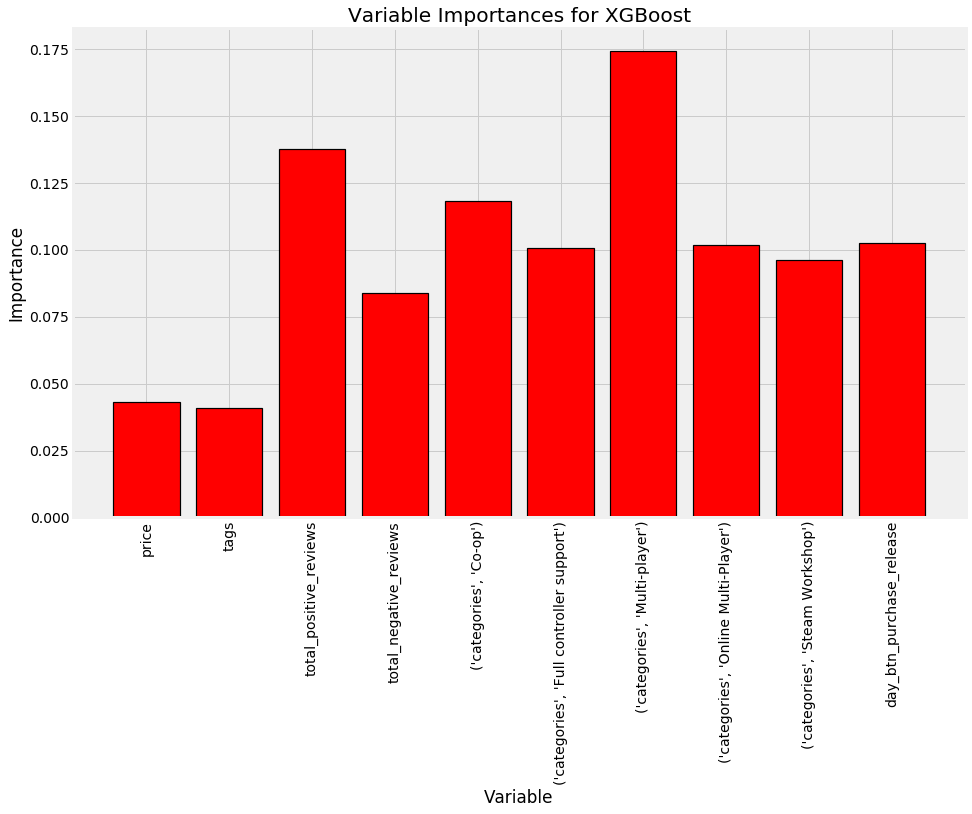

In [8]:
feature_list = list(X_train.columns)
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

plt.figure(figsize=(16,9))
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for XGBoost');

In [9]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
-cv_results['test_score'].mean()

[11:17:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


103.6049763794565